In [1]:
!pip install zod
!pip install "zod[all]"
!pip install "zod[cli]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.5/95.5 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.8/195.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.1/572.1 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.3/162.3 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.2 MB/s eta 0:00:00
  Attempting uninstall: urlli

In [3]:
%load_ext autoreload
%autoreload 2
import sys

sys.path.append("../")

from typing import List

import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 10]

# import the ZOD DevKit
from zod import ZodFrames
from zod import ZodSequences
from zod import ZodDrives

# import default constants
import zod.constants as constants
from zod.constants import Camera, Lidar, Anonymization, AnnotationProject

# import useful data classes
from zod.data_classes import LidarData

# NOTE! Set the path to dataset and choose a version
dataset_root = "/content/drive/MyDrive/Colab Notebooks/zodNew"  # your local path to zod
version = "mini"  # "mini" or "full"

# initialize ZodFrames
zod_frames = ZodFrames(dataset_root=dataset_root, version=version)

# initialize ZodSequences
zod_sequences = ZodSequences(dataset_root=dataset_root, version=version)

# initialize ZodSequences
zod_drives = ZodDrives(dataset_root=dataset_root, version=version)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# get default training and validation splits
training_frames = zod_frames.get_split(constants.TRAIN)
validation_frames = zod_frames.get_split(constants.VAL)

# print the number of training and validation frames
print(f"Number of training frames: {len(training_frames)}")
print(f"Number of validation frames: {len(validation_frames)}")

training_sequences = zod_sequences.get_split(constants.TRAIN)
validation_sequences = zod_sequences.get_split(constants.VAL)
print(f"Number of training sequences: {len(training_sequences)}")
print(f"Number of validation sequences: {len(validation_sequences)}")

# print out the first 5 training frames
print("The 5 first training frames have the ids:", sorted(list(training_frames))[:5])

# show the first training sequence
print("The first training sequence has the id:", sorted(list(training_sequences))[0])

Number of training frames: 10
Number of validation frames: 2
Number of training sequences: 1
Number of validation sequences: 1
The 5 first training frames have the ids: ['009158', '018591', '023996', '029229', '044953']
The first training sequence has the id: 000000


In [13]:
# we can get a specific sequence by its id
sequence_from_id = zod_sequences["000000"]
# or via the index
sequence_from_idx = zod_sequences[0000]

# these two sequences are the same
assert sequence_from_id.info == sequence_from_idx.info

In [21]:
import pandas as pd

# Define the list of frame IDs
sequence_ids_to_include = ['000000', '000002']

# Initialize an empty list to store metadata of selected frames
metadata_list = []

# Iterate over each frame ID
for sequence_id in sequence_ids_to_include:
    # Retrieve the frame using its ID
    zod_sequence = zod_sequences[sequence_id]
    # Access the metadata of the frame
    metadata = zod_sequence.metadata
    # Append metadata to the list
    metadata_list.append([
        metadata.sequence_id,
        metadata.start_time,
        metadata.end_time,
        metadata.country_code,
        metadata.collection_car,
        metadata.longitude,
        metadata.latitude
    ])

# Create a DataFrame from the list of metadata
metadata_df = pd.DataFrame(metadata_list, columns=[
    "Frame ID", "Start Time", "End Time", "Country Code", "Collection Car", "Longitude", "Latitude"
])

# Print the DataFrame
print(metadata_df)


  Frame ID                       Start Time                         End Time  \
0   000000 2022-02-14 13:23:32.140954+00:00 2022-02-14 13:23:52.252109+00:00   
1   000002 2022-06-13 10:49:57.555450+00:00 2022-06-13 10:50:17.555647+00:00   

  Country Code Collection Car  Longitude   Latitude  
0           SE         quebec  12.816931  57.755332  
1           DE          romeo   9.937544  52.204001  


In [26]:
# we can use the frame to get the OXTS of our the vehicle
zod_sequence = zod_sequences['000000']
oxts = zod_sequence.oxts

print(f"Poses: {oxts.poses.shape}")
print(f"Velocities: {oxts.velocities.shape}")
print(f"Acceleration: {oxts.accelerations.shape}")
print(f"Angular rates: {oxts.angular_rates.shape}")
print(f"Timestamps: {oxts.timestamps.shape}")
print(f"origin_lat_lon: {oxts.origin_lat_lon}")




Poses: (5000, 4, 4)
Velocities: (5000, 3)
Acceleration: (5000, 3)
Angular rates: (5000, 3)
Timestamps: (5000,)
origin_lat_lon: (57.75533168376196, 12.816931105649253)


In [55]:
# we can use the frame to get the OXTS of our the vehicle
zod_sequence = zod_sequences['000000']
vehicle_data = zod_sequence.vehicle_data
print(vehicle_data)
import pandas as pd

# Extract data from vehicle_data
ego_vehicle_data = vehicle_data.ego_vehicle_data
ego_vehicle_controls = vehicle_data.ego_vehicle_controls
satellite = vehicle_data.satellite

# Create a DataFrame for ego_vehicle_data
ego_vehicle_data_df = pd.DataFrame({
    'timestamp': ego_vehicle_data.timestamp,
    'roll_rate': ego_vehicle_data.roll_rate,
    'pitch_rate': ego_vehicle_data.picth_rate,
    'lat_vel': ego_vehicle_data.lat_vel,
    'lon_vel': ego_vehicle_data.lon_vel,
    'lat_acc': ego_vehicle_data.lat_acc,
    'lon_acc': ego_vehicle_data.lon_acc,
    'body_height': ego_vehicle_data.body_height,
    'body_pitch': ego_vehicle_data.body_pitch
})

# Create a DataFrame for ego_vehicle_controls
ego_vehicle_controls_df = pd.DataFrame({
    'timestamp': ego_vehicle_controls.timestamp,
    'acc_pedal': ego_vehicle_controls.acc_pedal,
    'brake_pedal_pressed': ego_vehicle_controls.brake_pedal_pressed,
    'steering_angle': ego_vehicle_controls.steering_angle,
    'steering_angle_rate': ego_vehicle_controls.steering_angle_rate,
    'steering_wheel_torque': ego_vehicle_controls.steering_wheel_torque,
    'turn_indicator': ego_vehicle_controls.turn_indicator
})

# Create a DataFrame for satellite data
satellite_df = pd.DataFrame({
    'timestamp': satellite.timstamp,
    'altitude': satellite.altitude,
    'heading': satellite.heading,
    'latpos': satellite.latpos,
    'lonpos': satellite.lonpos,
    'nrof_satellites': satellite.nrof_satellites,
    'speed': satellite.speed
})

# Display the DataFrames
print("Ego Vehicle Data:")
print(ego_vehicle_data_df)

print("\nEgo Vehicle Controls:")
print(ego_vehicle_controls_df)

print("\nSatellite Data:")
print(satellite_df)

# print(f"Poses: {oxts.poses.shape}")
# print(f"Velocities: {oxts.velocities.shape}")
# print(f"Acceleration: {oxts.accelerations.shape}")
# print(f"Angular rates: {oxts.angular_rates.shape}")
# print(f"Timestamps: {oxts.timestamps.shape}")
# print(f"origin_lat_lon: {oxts.origin_lat_lon}")




VehicleData(ego_vehicle_data=EgoVehicleData(roll_rate=array([ 0.00048828, -0.01367188, -0.03125   , ...,  0.00537109,
        0.00195312,  0.00537109], dtype=float32), picth_rate=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), lat_vel=array([-0.00390637, -0.00781274, -0.00781274, ..., -0.02343821,
       -0.02734458, -0.02734458], dtype=float32), lon_vel=array([18.59596, 18.62333, 18.6116 , ..., 15.69083, 15.72211, 15.74166],
      dtype=float32), lat_acc=array([0.476 , 0.442 , 0.3145, ..., 0.2805, 0.    , 0.17  ], dtype=float32), lon_acc=array([0.09765625, 0.        , 0.        , ..., 0.2939453 , 0.2939453 ,
       0.2939453 ], dtype=float32), body_height=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), body_pitch=array([0.00383683, 0.00370893, 0.00281367, ..., 0.00191841, 0.00204631,
       0.00204631], dtype=float32), timestamp=array([1644844772828650449, 1644844772849091234, 1644844772869567196, ...,
       1644848064764069248, 1644848064784410952, 1644848064804792482])), 

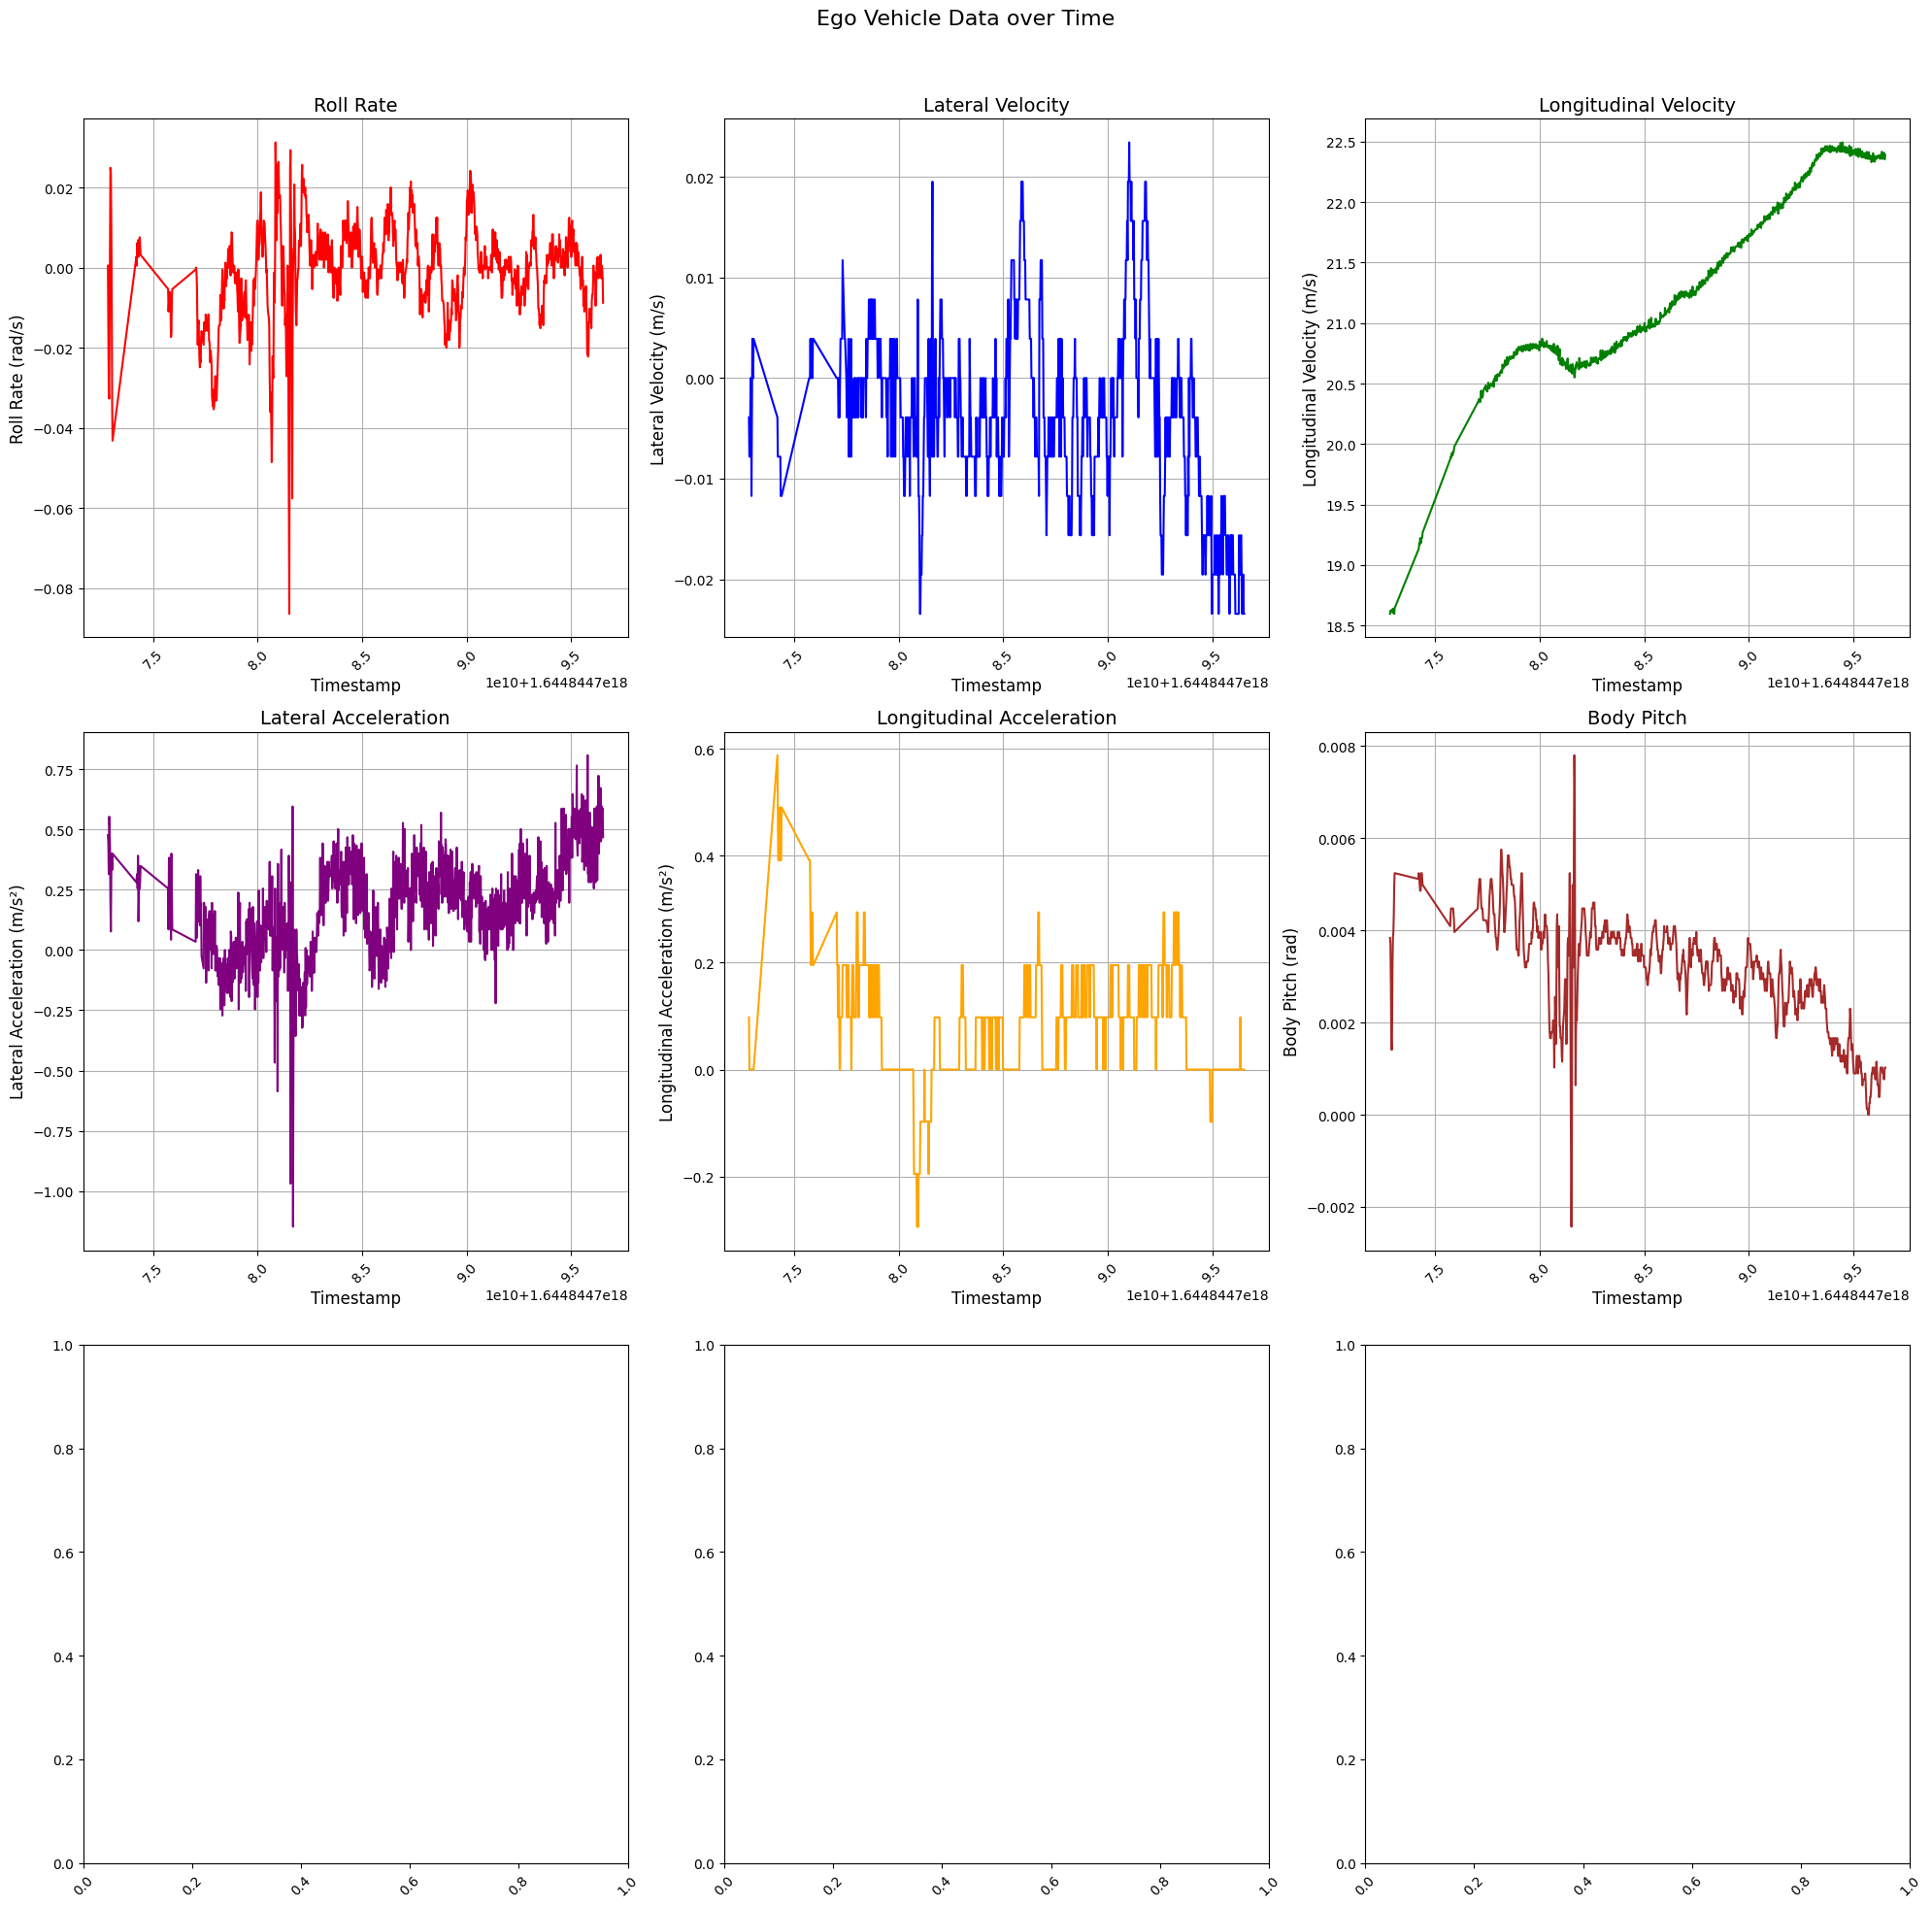

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

zod_sequence = zod_sequences['000000']

# Define a function to plot individual time series data
def plot_individual_time_series(ax, time, data, title, y_label, color):
    ax.plot(time, data, color=color)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Timestamp', fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)
    ax.grid(True)

# Convert Unix timestamps to human-readable datetime format
def convert_timestamps(timestamps):
    return [datetime.utcfromtimestamp(ts / 1e9) for ts in timestamps]  # Convert nanoseconds to seconds

# Extract data from vehicle_data
vehicle_data = zod_sequence.vehicle_data
ego_vehicle_data = vehicle_data.ego_vehicle_data
time = ego_vehicle_data.timestamp
# ego_vehicle_controls = vehicle_data.ego_vehicle_controls
# satellite = vehicle_data.satellite

# Create a 4x2 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(20, 20))
fig.suptitle('Ego Vehicle Data over Time', fontsize=16)

# Colors for different types of data
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray']

# Plot the data
plot_individual_time_series(axs[0, 0], time[:1000], ego_vehicle_data.roll_rate[:1000], 'Roll Rate', 'Roll Rate (rad/s)', colors[0])
plot_individual_time_series(axs[0, 1], time[:1000], ego_vehicle_data.lat_vel[:1000], 'Lateral Velocity', 'Lateral Velocity (m/s)', colors[1])
plot_individual_time_series(axs[0, 2], time[:1000], ego_vehicle_data.lon_vel[:1000], 'Longitudinal Velocity', 'Longitudinal Velocity (m/s)', colors[2])
plot_individual_time_series(axs[1, 0], time[:1000], ego_vehicle_data.lat_acc[:1000], 'Lateral Acceleration', 'Lateral Acceleration (m/s²)', colors[3])
plot_individual_time_series(axs[1, 1], time[:1000], ego_vehicle_data.lon_acc[:1000], 'Longitudinal Acceleration', 'Longitudinal Acceleration (m/s²)', colors[4])
plot_individual_time_series(axs[1, 2], time[:1000], ego_vehicle_data.body_pitch[:1000], 'Body Pitch', 'Body Pitch (rad)', colors[5])

# Rotate x-axis labels for better readability and set font size
for ax in axs.flat:
    plt.sca(ax)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the main title
plt.show()


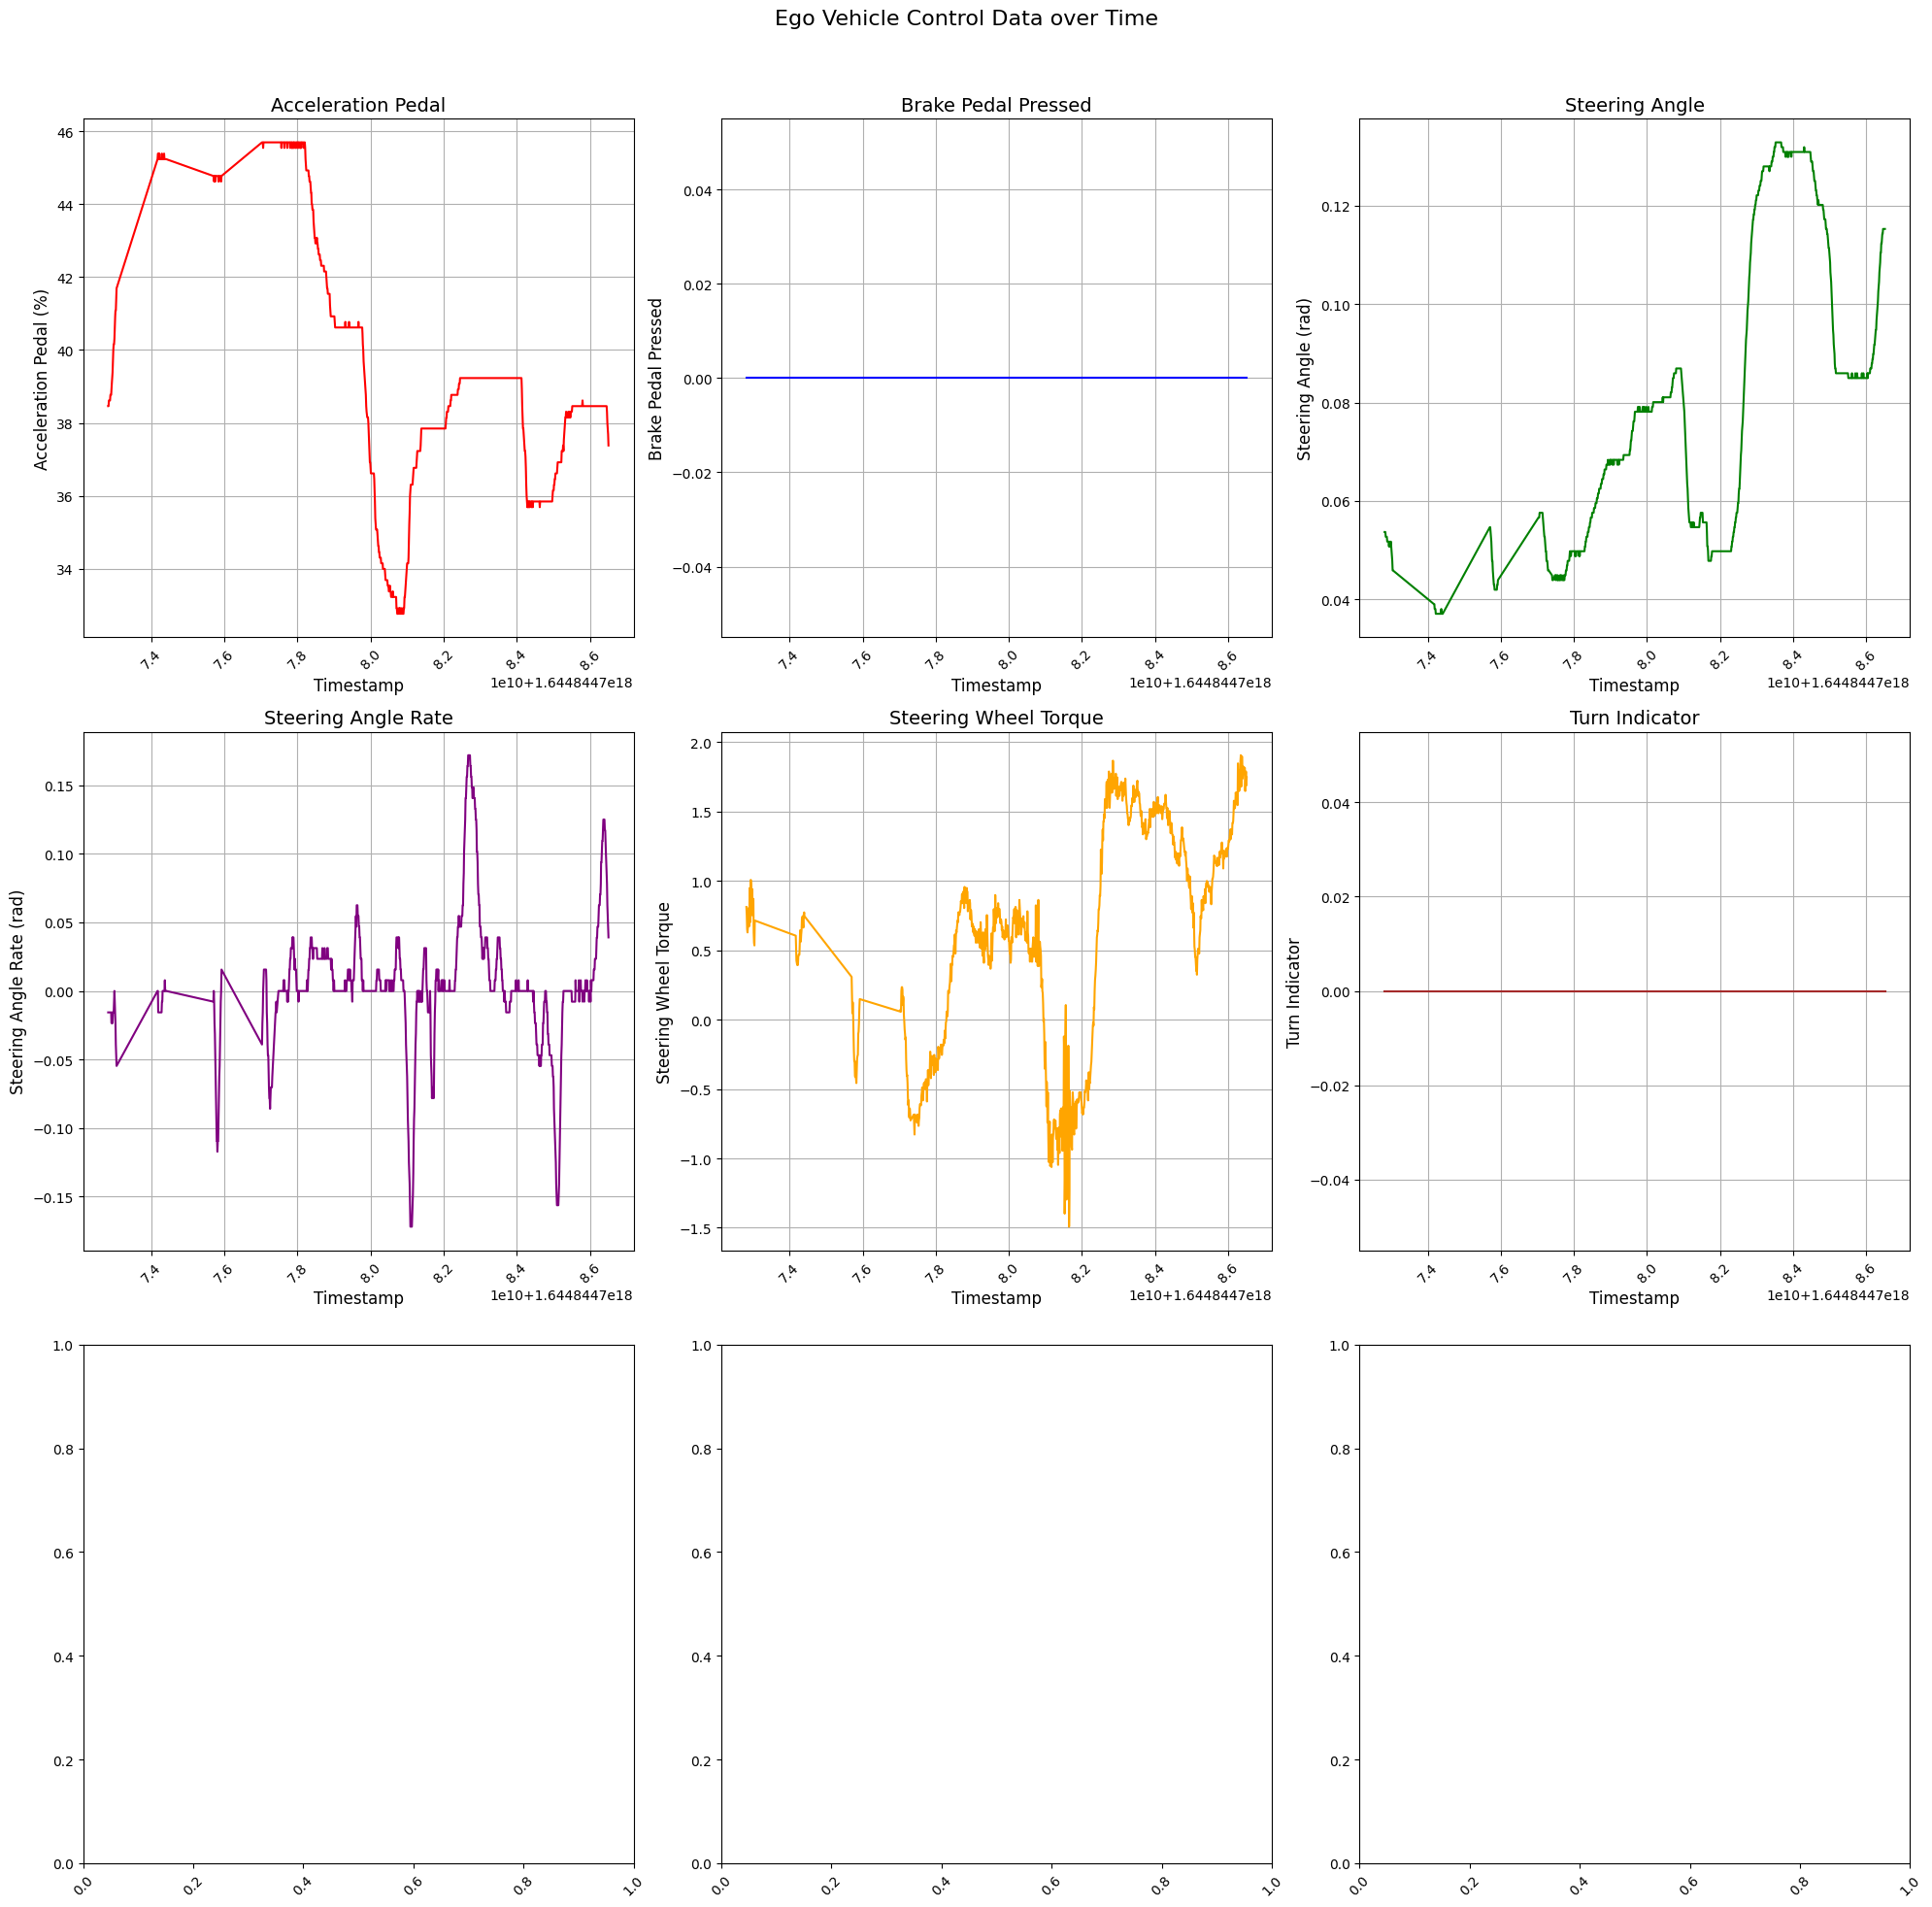

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

zod_sequence = zod_sequences['000000']

# Define a function to plot individual time series data
def plot_individual_time_series(ax, time, data, title, y_label, color):
    ax.plot(time, data, color=color)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Timestamp', fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)
    ax.grid(True)

# Convert Unix timestamps to human-readable datetime format
def convert_timestamps(timestamps):
    return [datetime.utcfromtimestamp(ts / 1e9) for ts in timestamps]  # Convert nanoseconds to seconds

# Extract data from vehicle_data
vehicle_data = zod_sequence.vehicle_data
ego_vehicle_controls = vehicle_data.ego_vehicle_controls
time = ego_vehicle_controls.timestamp
# satellite = vehicle_data.satellite

# Create a 4x2 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(20, 20))
fig.suptitle('Ego Vehicle Control Data over Time', fontsize=16)

# Colors for different types of data
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray']

# Plot the data
plot_individual_time_series(axs[0, 0], time[:1000], ego_vehicle_controls.acc_pedal[:1000], 'Acceleration Pedal', 'Acceleration Pedal (%)', colors[0])
plot_individual_time_series(axs[0, 1], time[:1000], ego_vehicle_controls.brake_pedal_pressed[:1000], 'Brake Pedal Pressed', 'Brake Pedal Pressed', colors[1])
plot_individual_time_series(axs[0, 2], time[:1000], ego_vehicle_controls.steering_angle[:1000], 'Steering Angle', 'Steering Angle (rad)', colors[2])
plot_individual_time_series(axs[1, 0], time[:1000], ego_vehicle_controls.steering_angle_rate[:1000], 'Steering Angle Rate', 'Steering Angle Rate (rad)', colors[3])
plot_individual_time_series(axs[1, 1], time[:1000], ego_vehicle_controls.steering_wheel_torque[:1000], 'Steering Wheel Torque', 'Steering Wheel Torque', colors[4])
plot_individual_time_series(axs[1, 2], time[:1000], ego_vehicle_controls.turn_indicator[:1000], 'Turn Indicator', 'Turn Indicator', colors[5])

# Rotate x-axis labels for better readability and set font size
for ax in axs.flat:
    plt.sca(ax)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the main title
plt.show()


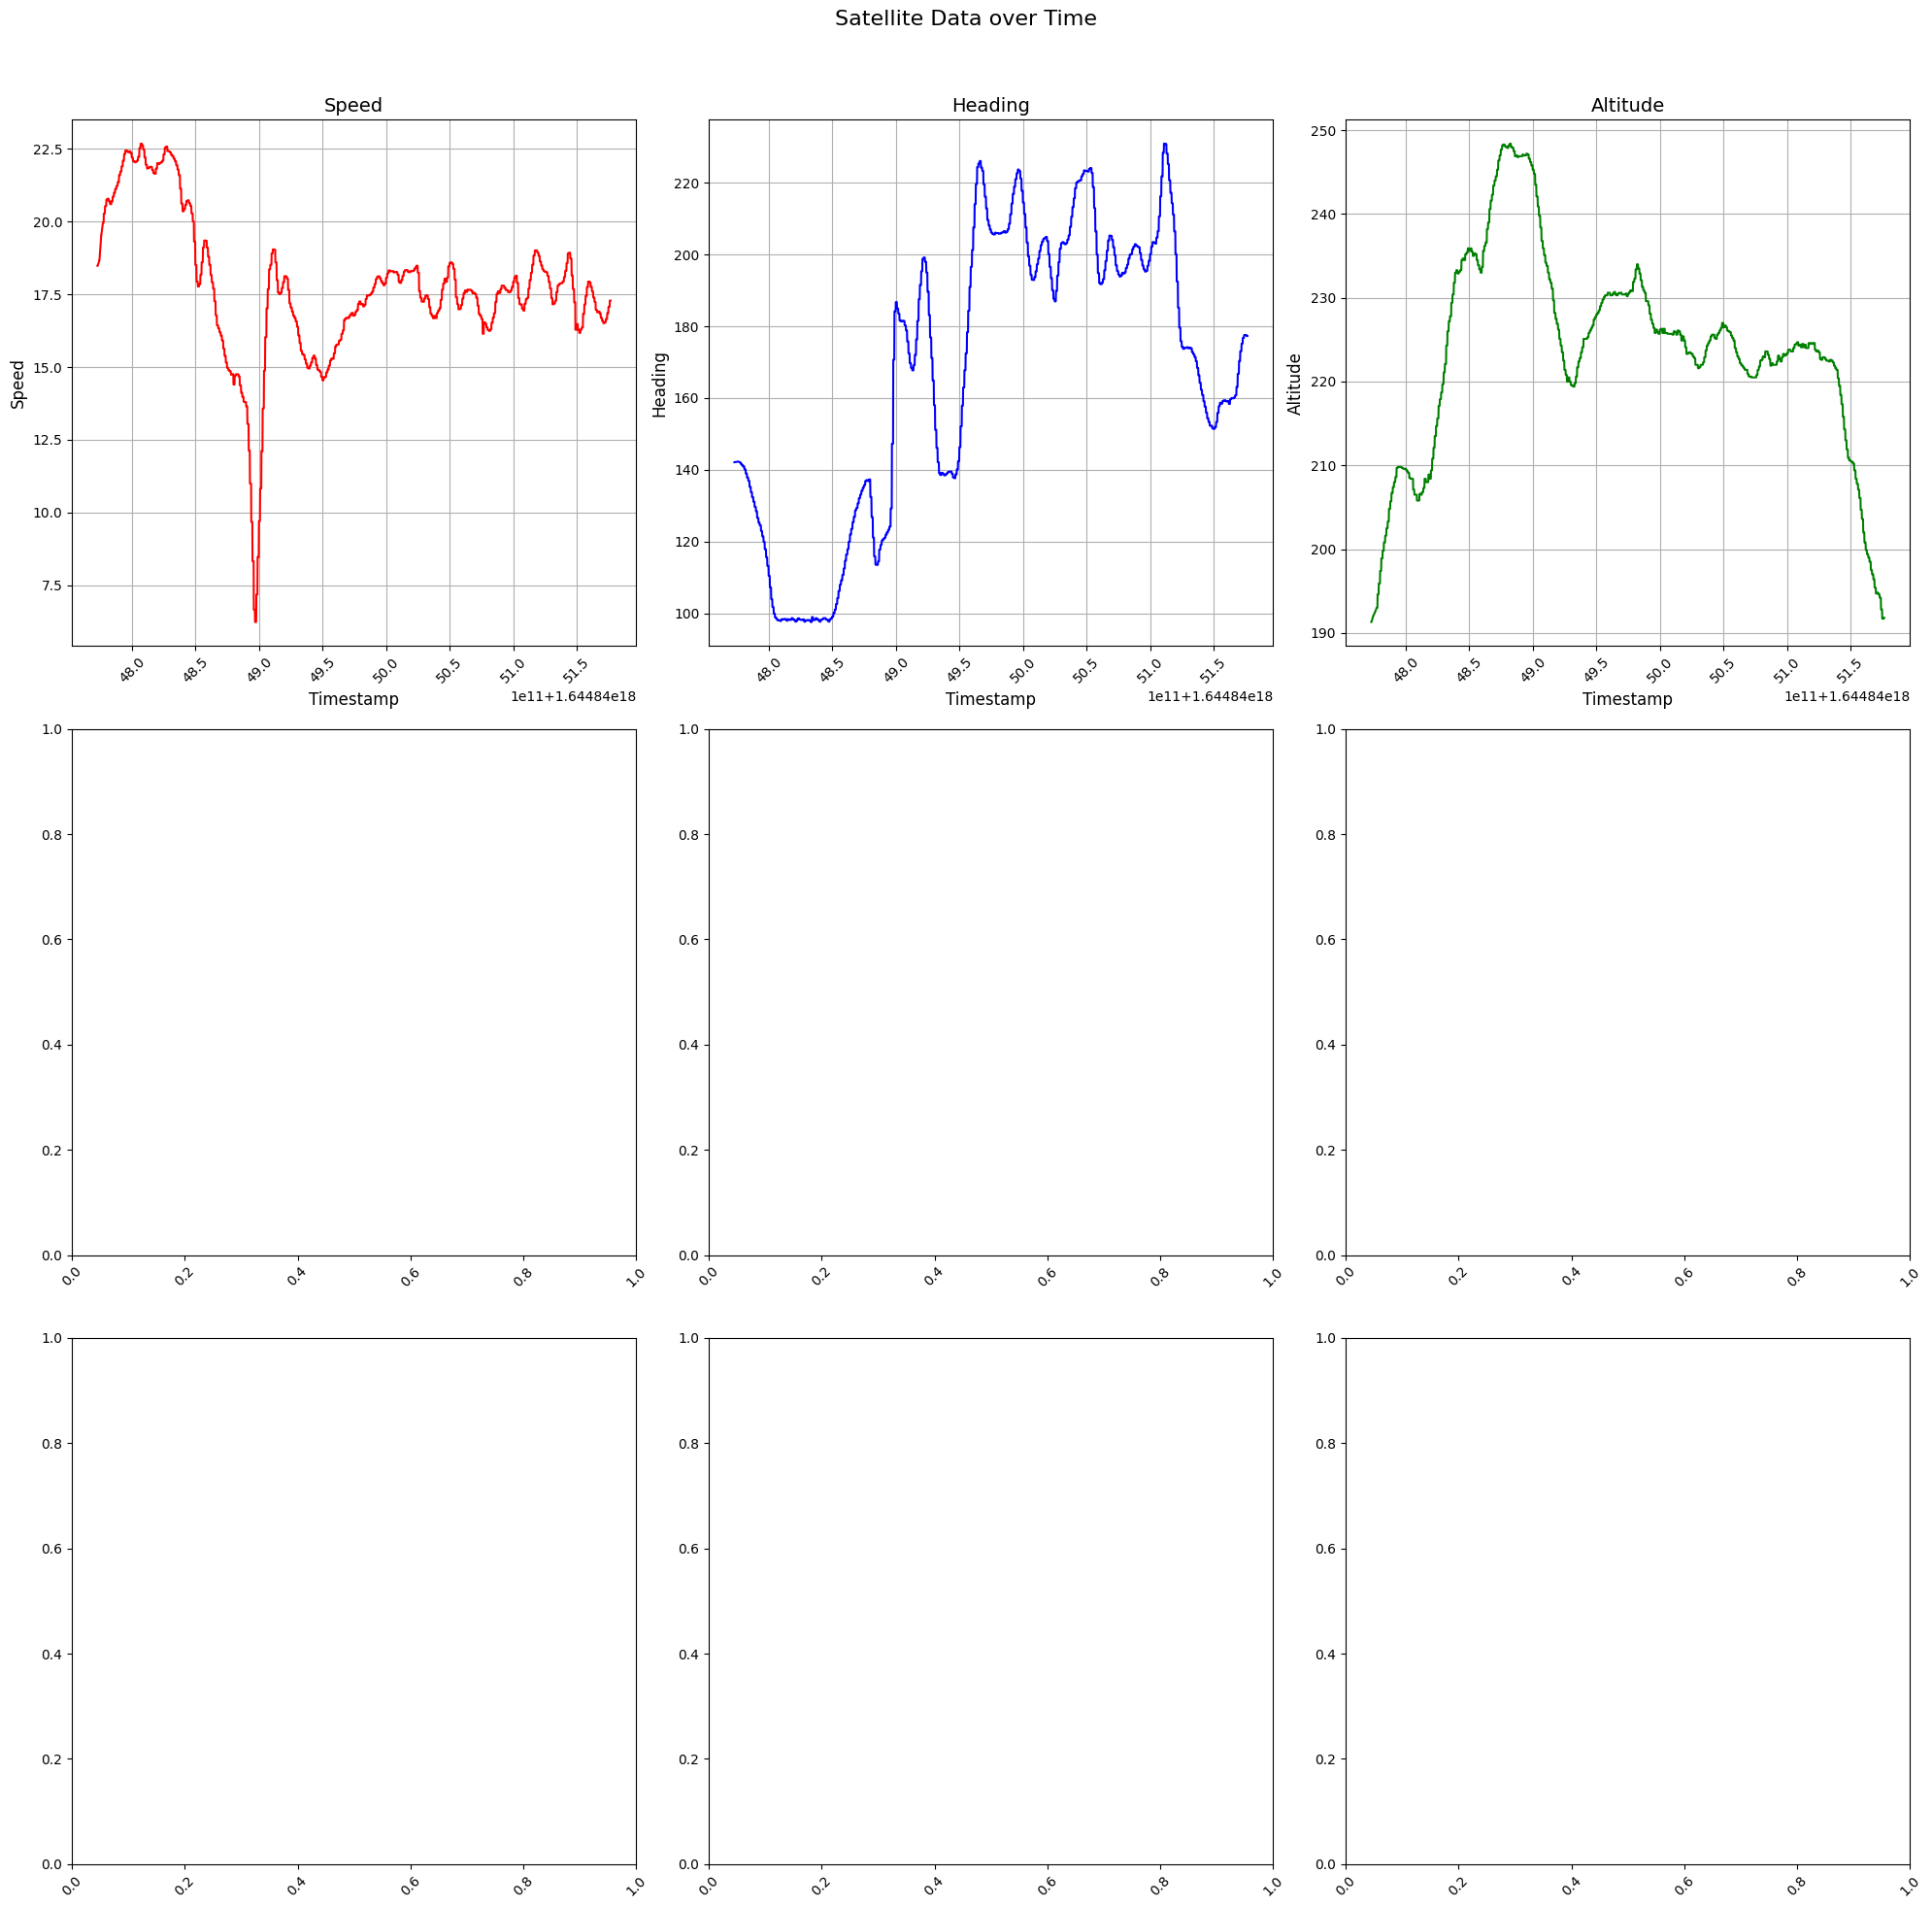

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

zod_sequence = zod_sequences['000000']

# Define a function to plot individual time series data
def plot_individual_time_series(ax, time, data, title, y_label, color):
    ax.plot(time, data, color=color)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Timestamp', fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)
    ax.grid(True)

# Convert Unix timestamps to human-readable datetime format
def convert_timestamps(timestamps):
    return [datetime.utcfromtimestamp(ts / 1e9) for ts in timestamps]  # Convert nanoseconds to seconds

# Extract data from vehicle_data
vehicle_data = zod_sequence.vehicle_data
satellite = vehicle_data.satellite
time = satellite.timstamp

# Create a 4x2 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(20, 20))
fig.suptitle('Satellite Data over Time', fontsize=16)

# Colors for different types of data
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray']

# Plot the data
plot_individual_time_series(axs[0, 0], time[:5000], satellite.speed[:5000], 'Speed', 'Speed', colors[0])
plot_individual_time_series(axs[0, 1], time[:5000], satellite.heading[:5000], 'Heading', 'Heading', colors[1])
plot_individual_time_series(axs[0, 2], time[:5000], satellite.altitude[:5000], 'Altitude', 'Altitude', colors[2])

# Rotate x-axis labels for better readability and set font size
for ax in axs.flat:
    plt.sca(ax)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the main title
plt.show()


In [27]:
# Example of printing the data in a more readable format
import pandas as pd

# Create a DataFrame to display the data in a tabular format
oxts_df = pd.DataFrame({
    "Timestamps": oxts.timestamps,
    "Acceleration X": oxts.accelerations[:, 0],
    "Acceleration Y": oxts.accelerations[:, 1],
    "Acceleration Z": oxts.accelerations[:, 2],
    "Velocity X": oxts.velocities[:, 0],
    "Velocity Y": oxts.velocities[:, 1],
    "Velocity Z": oxts.velocities[:, 2],
    "Angular Rate X": oxts.angular_rates[:, 0],
    "Angular Rate Y": oxts.angular_rates[:, 1],
    "Angular Rate Z": oxts.angular_rates[:, 2],
})

# Print the DataFrame
print(oxts_df)

        Timestamps  Acceleration X  Acceleration Y  Acceleration Z  \
0     1.644845e+09          0.1484         -0.3445         -9.3530   
1     1.644845e+09          0.1189         -0.2158         -9.4163   
2     1.644845e+09          0.1311         -0.0927         -9.5188   
3     1.644845e+09          0.1442         -0.1734         -9.6323   
4     1.644845e+09          0.1478         -0.3625         -9.5656   
...            ...             ...             ...             ...   
4995  1.644845e+09         -0.1586         -1.2463         -9.7330   
4996  1.644845e+09         -0.1396         -1.4115         -9.6952   
4997  1.644845e+09         -0.1148         -1.3864         -9.7597   
4998  1.644845e+09         -0.1151         -1.2945         -9.7467   
4999  1.644845e+09         -0.1617         -1.2869         -9.6116   

      Velocity X  Velocity Y  Velocity Z  Angular Rate X  Angular Rate Y  \
0      18.273497   -0.095797      0.1223        4.328696        0.968299   
1      

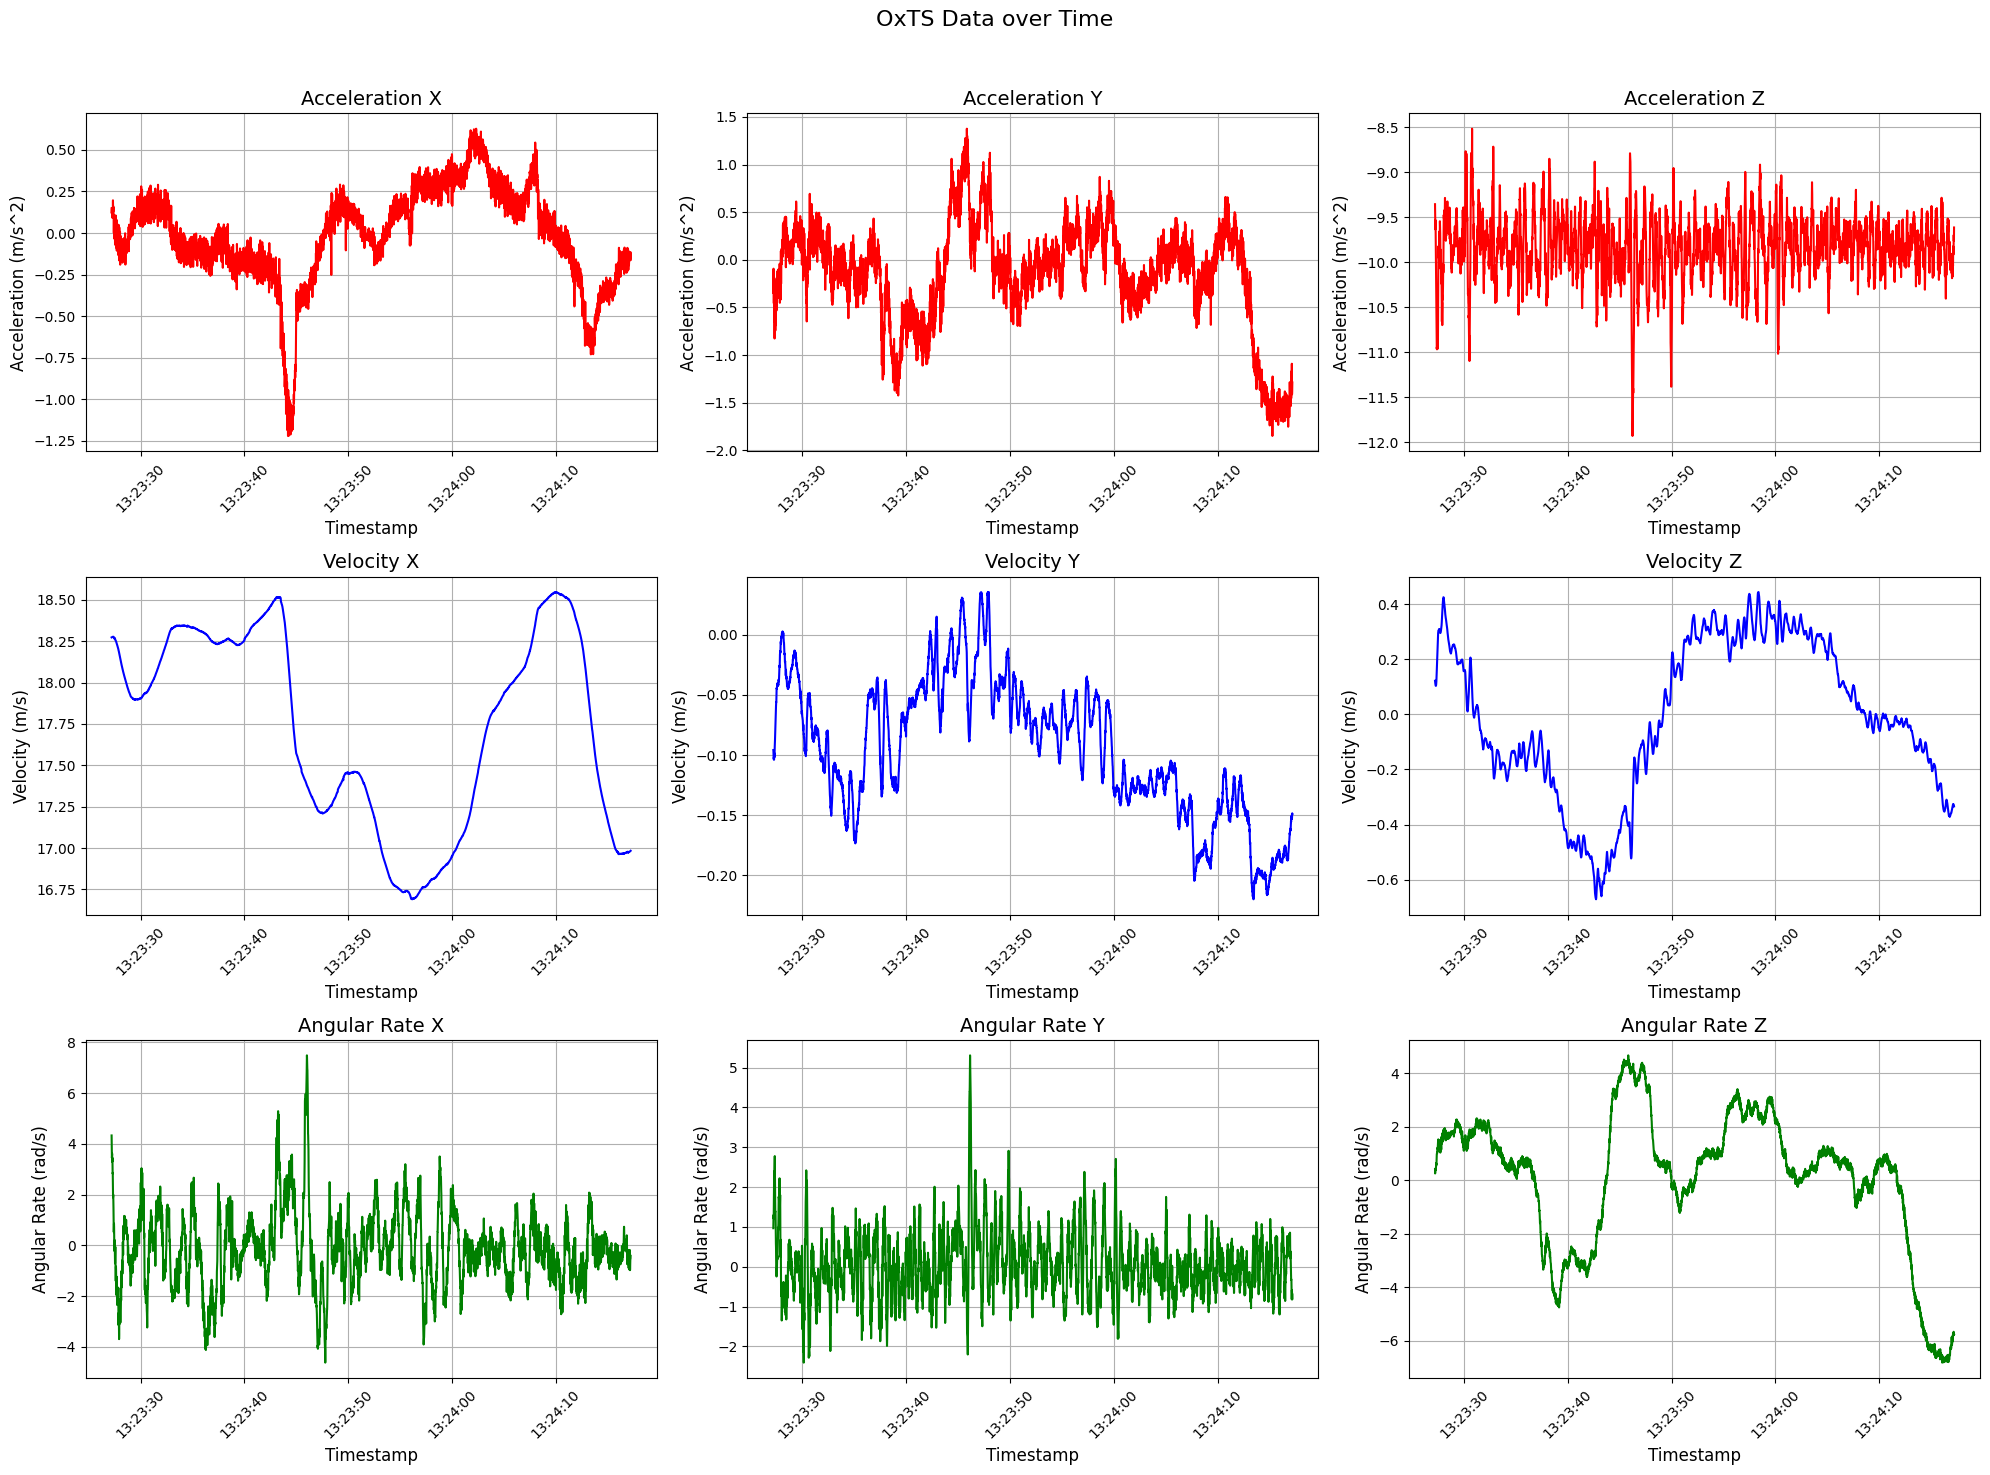

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Define a function to plot individual time series data
def plot_individual_time_series(ax, time, data, title, y_label, color):
    ax.plot(time, data, color=color)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Timestamp', fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)
    ax.grid(True)

# Convert Unix timestamps to human-readable datetime format
def convert_timestamps(timestamps):
    return [datetime.utcfromtimestamp(ts) for ts in timestamps]

# Retrieve the OxTS data for a specific frame
oxts = zod_sequence.oxts
time = convert_timestamps(oxts.timestamps)

# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('OxTS Data over Time', fontsize=16)

# Colors for different types of data
acceleration_color = 'red'
velocity_color = 'blue'
angular_rate_color = 'green'

# Plot the accelerations
plot_individual_time_series(axs[0, 0], time, oxts.accelerations[:, 0], 'Acceleration X', 'Acceleration (m/s^2)', acceleration_color)
plot_individual_time_series(axs[0, 1], time, oxts.accelerations[:, 1], 'Acceleration Y', 'Acceleration (m/s^2)', acceleration_color)
plot_individual_time_series(axs[0, 2], time, oxts.accelerations[:, 2], 'Acceleration Z', 'Acceleration (m/s^2)', acceleration_color)

# Plot the velocities
plot_individual_time_series(axs[1, 0], time, oxts.velocities[:, 0], 'Velocity X', 'Velocity (m/s)', velocity_color)
plot_individual_time_series(axs[1, 1], time, oxts.velocities[:, 1], 'Velocity Y', 'Velocity (m/s)', velocity_color)
plot_individual_time_series(axs[1, 2], time, oxts.velocities[:, 2], 'Velocity Z', 'Velocity (m/s)', velocity_color)

# Plot the angular rates
plot_individual_time_series(axs[2, 0], time, oxts.angular_rates[:, 0], 'Angular Rate X', 'Angular Rate (rad/s)', angular_rate_color)
plot_individual_time_series(axs[2, 1], time, oxts.angular_rates[:, 1], 'Angular Rate Y', 'Angular Rate (rad/s)', angular_rate_color)
plot_individual_time_series(axs[2, 2], time, oxts.angular_rates[:, 2], 'Angular Rate Z', 'Angular Rate (rad/s)', angular_rate_color)

# Rotate x-axis labels for better readability and set font size
for ax in axs.flat:
    plt.sca(ax)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the main title
plt.show()


In [31]:
# we can use the frame to get the ego-motion of our the vehicle
# note that the ego-motion is a lightwieght version of the oxts data
zod_sequence = zod_sequences['000000']

ego_motion = zod_sequence.ego_motion
print(f"Acceleration: {ego_motion.accelerations.shape}")
print(f"Velocities: {ego_motion.velocities.shape}")
print(f"Poses: {ego_motion.poses.shape}")
print(f"Timestamps: {ego_motion.timestamps.shape}")
print(f"Angular rates: {ego_motion.angular_rates.shape}")
print(f"origin_lat_lon: {ego_motion.origin_lat_lon}")

Acceleration: (382, 3)
Velocities: (382, 3)
Poses: (382, 4, 4)
Timestamps: (382,)
Angular rates: (382, 3)
origin_lat_lon: (57.75533168376196, 12.816931105649253)


In [32]:
# Example of printing the data in a more readable format
import pandas as pd

zod_sequence = zod_sequences['000000']
ego_motion = zod_sequence.ego_motion

# Create a DataFrame to display the data in a tabular format
ego_motion_df = pd.DataFrame({
    "Timestamps": ego_motion.timestamps,
    "Acceleration X": ego_motion.accelerations[:, 0],
    "Acceleration Y": ego_motion.accelerations[:, 1],
    "Acceleration Z": ego_motion.accelerations[:, 2],
    "Velocity X": ego_motion.velocities[:, 0],
    "Velocity Y": ego_motion.velocities[:, 1],
    "Velocity Z": ego_motion.velocities[:, 2],
    "Angular Rate X": ego_motion.angular_rates[:, 0],
    "Angular Rate Y": ego_motion.angular_rates[:, 1],
    "Angular Rate Z": ego_motion.angular_rates[:, 2],
})

# Print the DataFrame
print(ego_motion_df)

       Timestamps  Acceleration X  Acceleration Y  Acceleration Z  Velocity X  \
0    1.644845e+09        0.169078        0.025232       -9.648262   18.172967   
1    1.644845e+09        0.127227       -0.076777       -9.670148   18.192392   
2    1.644845e+09        0.113431        0.065344       -9.735688   18.194262   
3    1.644845e+09        0.152067       -0.140850       -9.801567   18.210704   
4    1.644845e+09        0.131545        0.219678       -9.803123   18.215032   
..            ...             ...             ...             ...         ...   
377  1.644845e+09       -0.015356       -0.034165      -10.163327   17.311803   
378  1.644845e+09       -0.033251        0.034995      -10.234313   17.305428   
379  1.644845e+09        0.013152       -0.066390      -10.059667   17.288224   
380  1.644845e+09       -0.076072       -0.242318       -9.830927   17.263128   
381  1.644845e+09       -0.035544       -0.247612       -9.205366   17.241072   

     Velocity Y  Velocity Z

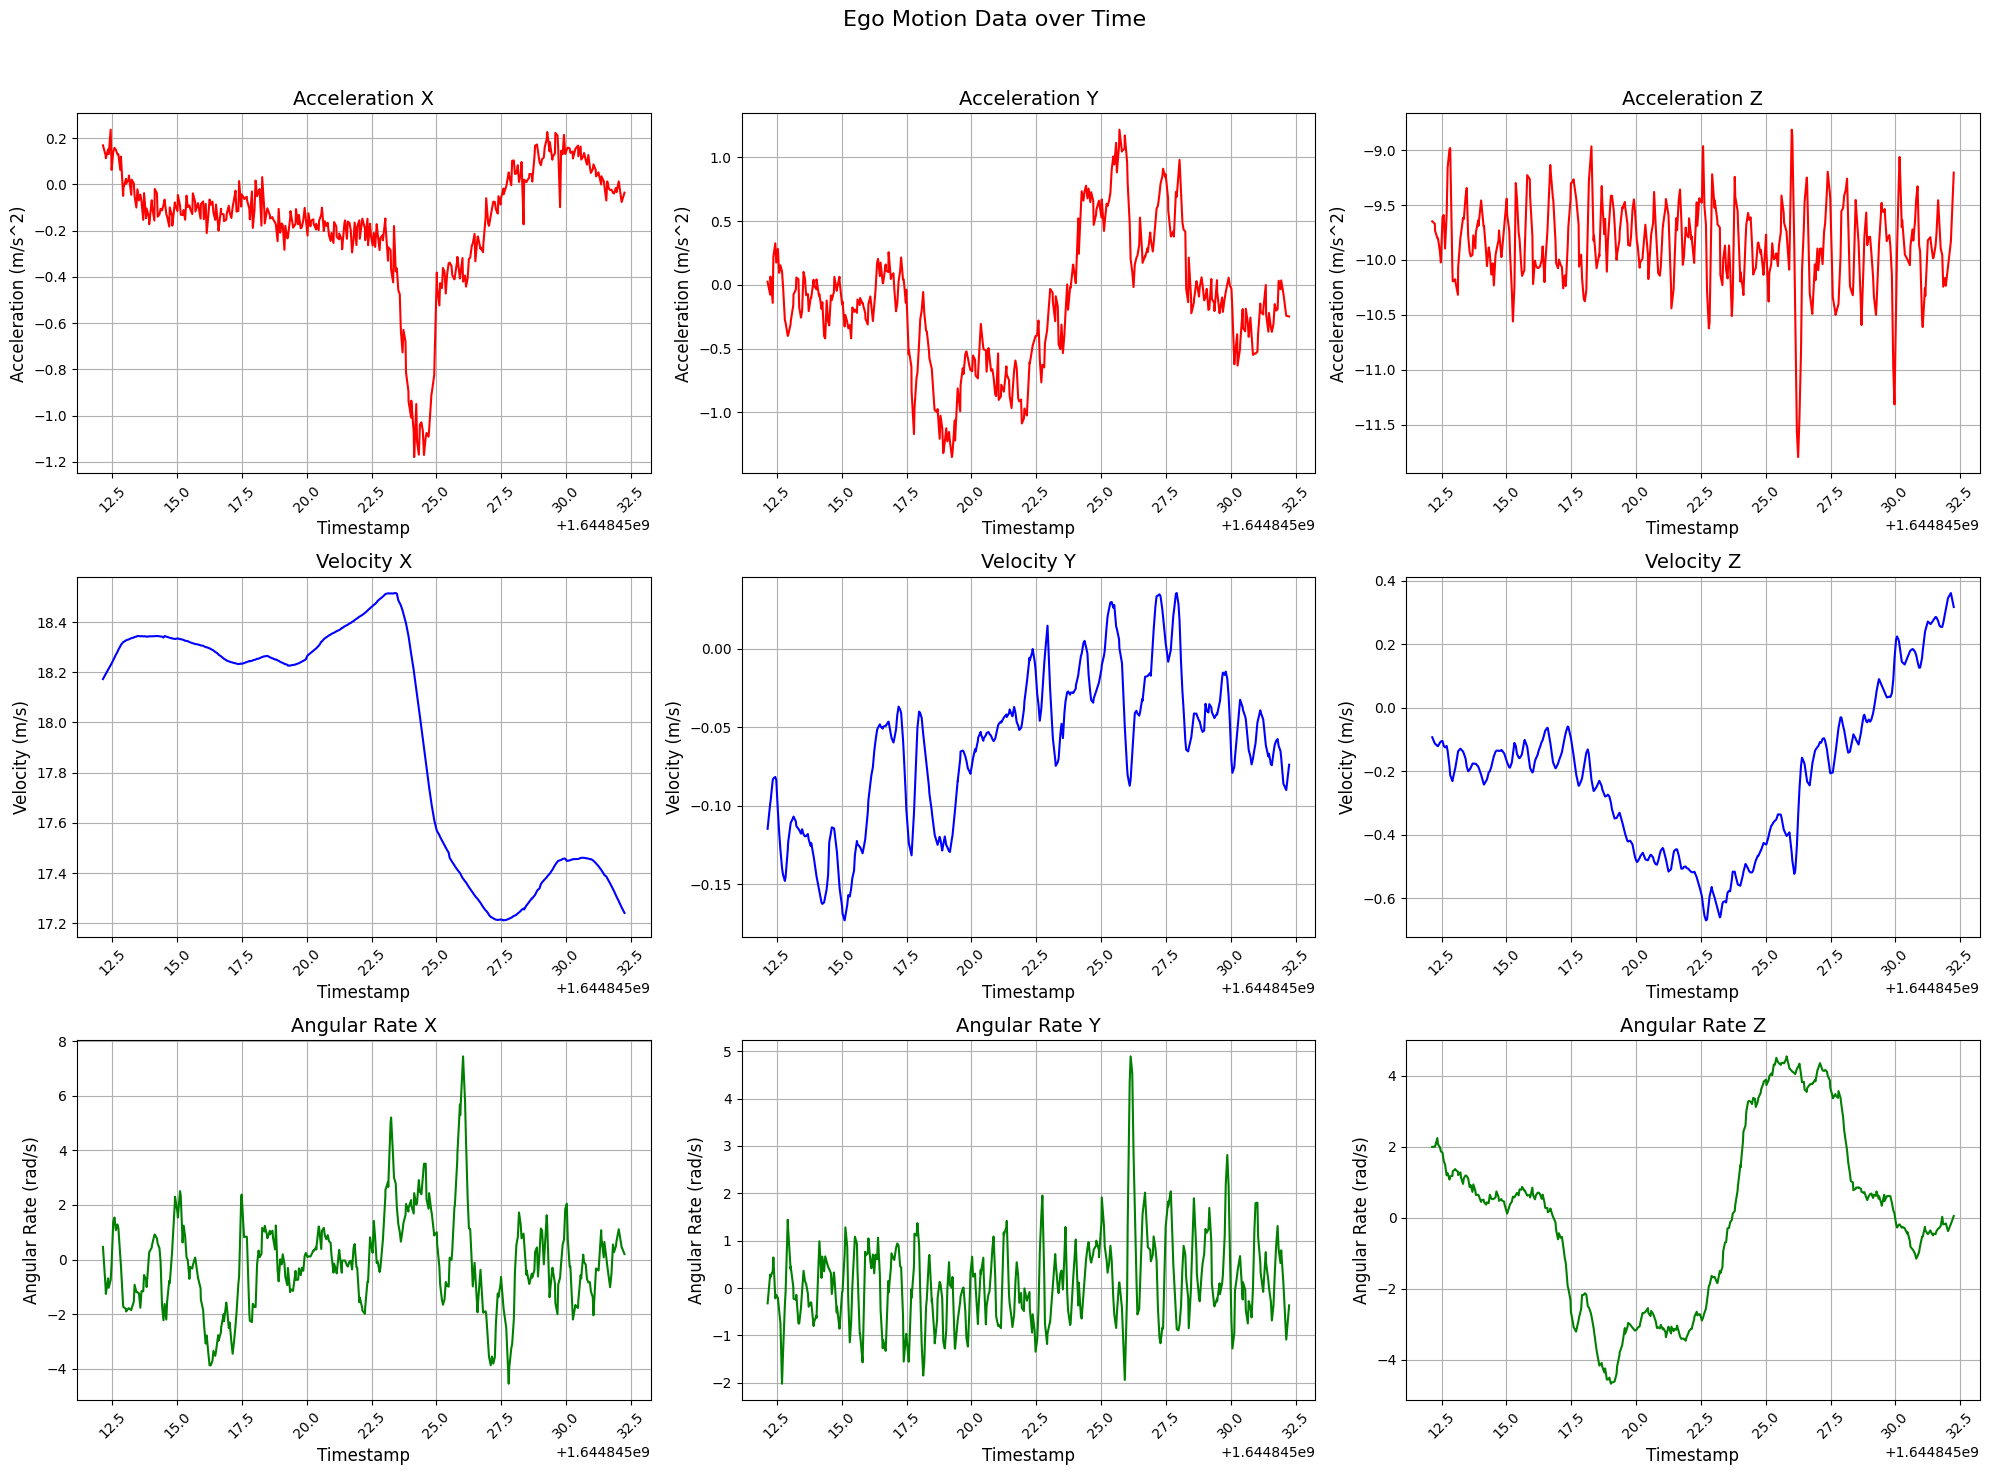

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Define a function to plot individual time series data
def plot_individual_time_series(ax, time, data, title, y_label, color):
    ax.plot(time, data, color=color)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Timestamp', fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)
    ax.grid(True)

# Convert Unix timestamps to human-readable datetime format
def convert_timestamps(timestamps):
    return [datetime.utcfromtimestamp(ts) for ts in timestamps]

# Retrieve the ego motion data for a specific frame
ego_motion = zod_sequence.ego_motion
time = ego_motion.timestamps

# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Ego Motion Data over Time', fontsize=16)

# Colors for different types of data
acceleration_color = 'red'
velocity_color = 'blue'
angular_rate_color = 'green'

# Plot the accelerations
plot_individual_time_series(axs[0, 0], time, ego_motion.accelerations[:, 0], 'Acceleration X', 'Acceleration (m/s^2)', acceleration_color)
plot_individual_time_series(axs[0, 1], time, ego_motion.accelerations[:, 1], 'Acceleration Y', 'Acceleration (m/s^2)', acceleration_color)
plot_individual_time_series(axs[0, 2], time, ego_motion.accelerations[:, 2], 'Acceleration Z', 'Acceleration (m/s^2)', acceleration_color)

# Plot the velocities
plot_individual_time_series(axs[1, 0], time, ego_motion.velocities[:, 0], 'Velocity X', 'Velocity (m/s)', velocity_color)
plot_individual_time_series(axs[1, 1], time, ego_motion.velocities[:, 1], 'Velocity Y', 'Velocity (m/s)', velocity_color)
plot_individual_time_series(axs[1, 2], time, ego_motion.velocities[:, 2], 'Velocity Z', 'Velocity (m/s)', velocity_color)

# Plot the angular rates
plot_individual_time_series(axs[2, 0], time, ego_motion.angular_rates[:, 0], 'Angular Rate X', 'Angular Rate (rad/s)', angular_rate_color)
plot_individual_time_series(axs[2, 1], time, ego_motion.angular_rates[:, 1], 'Angular Rate Y', 'Angular Rate (rad/s)', angular_rate_color)
plot_individual_time_series(axs[2, 2], time, ego_motion.angular_rates[:, 2], 'Angular Rate Z', 'Angular Rate (rad/s)', angular_rate_color)

# Rotate x-axis labels for better readability and set font size
for ax in axs.flat:
    plt.sca(ax)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the main title
plt.show()


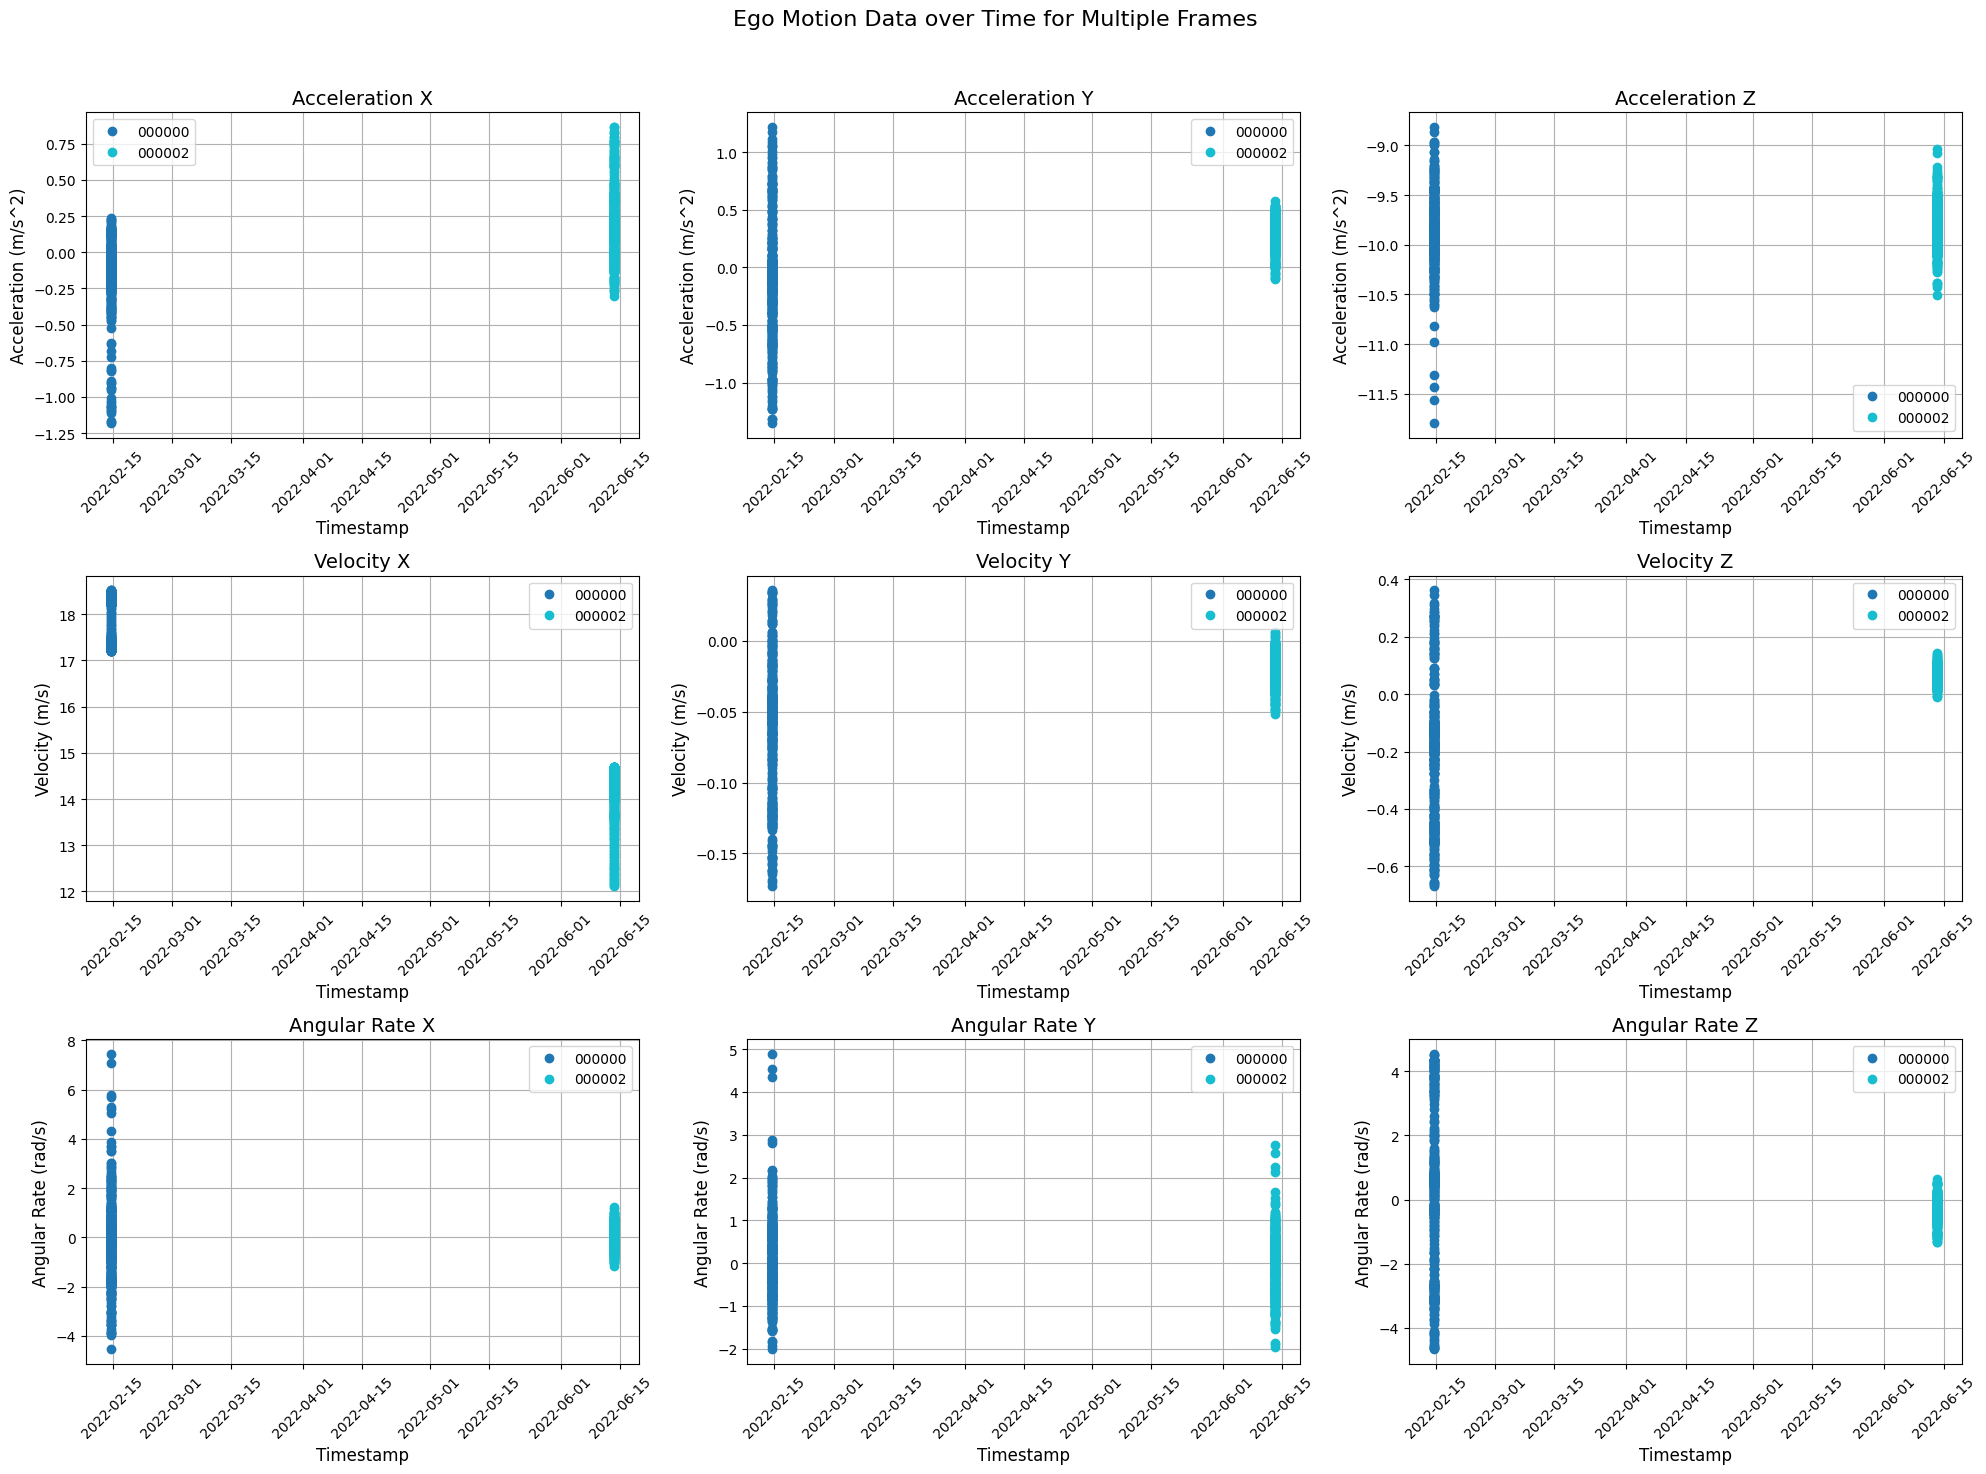

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Define a function to plot individual time series data for multiple frames
def plot_multiple_time_series(ax, times, data, title, y_label, colors, labels):
    for i, (time, frame_data) in enumerate(zip(times, data)):
        ax.plot(time, frame_data, label=labels[i], color=colors[i], marker='o', linestyle='None')
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Timestamp', fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)
    ax.grid(True)

# Convert Unix timestamps to human-readable datetime format
def convert_timestamps(timestamps):
    return [datetime.utcfromtimestamp(ts) for ts in timestamps]

# List of frame IDs to include
frame_ids_to_include = ['000000', '000002']

# Initialize lists to store time and ego motion data for each frame
all_times = []
all_accelerations = []
all_velocities = []
all_angular_rates = []
labels = []

# Loop through each frame ID and retrieve the data
for frame_id in frame_ids_to_include:
    zod_sequence = zod_sequences[frame_id]
    ego_motion = zod_sequence.ego_motion
    time = convert_timestamps(ego_motion.timestamps)

    all_times.append(time)
    all_accelerations.append(ego_motion.accelerations)
    all_velocities.append(ego_motion.velocities)
    all_angular_rates.append(ego_motion.angular_rates)
    labels.append(frame_id)

# Use the tab10 colormap for different colors
colors = plt.cm.tab10(np.linspace(0, 1, len(frame_ids_to_include)))

# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Ego Motion Data over Time for Multiple Frames', fontsize=16)

# Plot the accelerations
plot_multiple_time_series(axs[0, 0], all_times, [acc[:, 0] for acc in all_accelerations], 'Acceleration X', 'Acceleration (m/s^2)', colors, labels)
plot_multiple_time_series(axs[0, 1], all_times, [acc[:, 1] for acc in all_accelerations], 'Acceleration Y', 'Acceleration (m/s^2)', colors, labels)
plot_multiple_time_series(axs[0, 2], all_times, [acc[:, 2] for acc in all_accelerations], 'Acceleration Z', 'Acceleration (m/s^2)', colors, labels)

# Plot the velocities
plot_multiple_time_series(axs[1, 0], all_times, [vel[:, 0] for vel in all_velocities], 'Velocity X', 'Velocity (m/s)', colors, labels)
plot_multiple_time_series(axs[1, 1], all_times, [vel[:, 1] for vel in all_velocities], 'Velocity Y', 'Velocity (m/s)', colors, labels)
plot_multiple_time_series(axs[1, 2], all_times, [vel[:, 2] for vel in all_velocities], 'Velocity Z', 'Velocity (m/s)', colors, labels)

# Plot the angular rates
plot_multiple_time_series(axs[2, 0], all_times, [ang[:, 0] for ang in all_angular_rates], 'Angular Rate X', 'Angular Rate (rad/s)', colors, labels)
plot_multiple_time_series(axs[2, 1], all_times, [ang[:, 1] for ang in all_angular_rates], 'Angular Rate Y', 'Angular Rate (rad/s)', colors, labels)
plot_multiple_time_series(axs[2, 2], all_times, [ang[:, 2] for ang in all_angular_rates], 'Angular Rate Z', 'Angular Rate (rad/s)', colors, labels)

# Rotate x-axis labels for better readability and set font size
for ax in axs.flat:
    plt.sca(ax)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    ax.legend(fontsize=10)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the main title
plt.show()


In [6]:
# We can do the same for the sequences
seq = zod_sequences[list(validation_sequences)[0]]

# Get the lidar frames
print(f"Number of lidar frames: {len(seq.info.get_lidar_frames(lidar=Lidar.VELODYNE))}")
# We can also get the original camera frames
print(f"Number of camera frames: {len(seq.info.get_camera_frames())}")

# Or see how long the sequence is
print(f"Timespan: {(seq.info.end_time - seq.info.start_time).total_seconds()}")

Number of lidar frames: 181
Number of camera frames: 201
Timespan: 20.000197


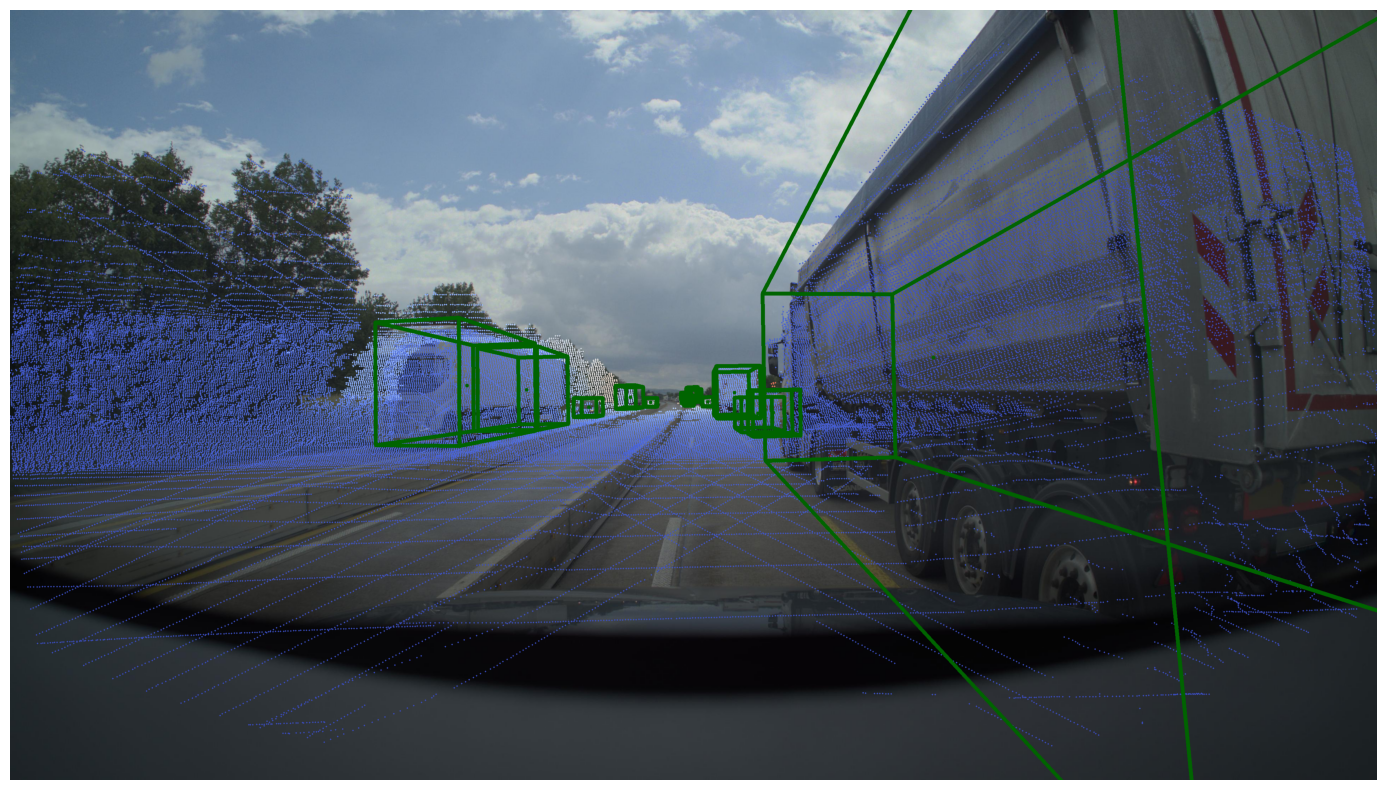

In [8]:
from zod.visualization.lidar_on_image import visualize_lidar_on_image
from zod.visualization.object_visualization import overlay_object_2d_box_on_image, overlay_object_3d_box_on_image

# get the key frames
key_camera_frame = seq.info.get_key_camera_frame()

# get the annotations (when they are ready...)
try:
    annotations = seq.get_annotation(AnnotationProject.OBJECT_DETECTION)
except:
    annotations = []

image = key_camera_frame.read()
pcd = seq.get_compensated_lidar(key_camera_frame.time)

image = visualize_lidar_on_image(
    pcd,
    seq.calibration,
    image,
)

for annotation in annotations:
    if annotation.box3d:
        image = overlay_object_3d_box_on_image(
            image, annotation.box3d, seq.calibration, color=(0, 100, 0), line_thickness=10
        )

plt.axis("off")
plt.imshow(image)
plt.show()

In [9]:
# we can also visualize the entire sequence
draw_every_nth = 5  # (Only visualization every nth frame for speed...)

# get the mapping between camera and lidar frames
frames = seq.info.get_camera_lidar_map()

images = []
# iterate over the frames
for i, frame in enumerate(frames):
    if i % draw_every_nth == 0:
        camera_frame, lidar_frame = frame

        img = camera_frame.read()
        pcd = seq.get_compensated_lidar(camera_frame.time)

        lid_image = visualize_lidar_on_image(
            pcd,
            seq.calibration,
            img,
        )
        images.append(img)